# Applying the Kalman Filter with Missing Observations

This example shows how one may apply class `KalmanFilter` when some
measurements are missing.

While the Kalman Filter and Kalman Smoother are typically presented assuming a
measurement exists for every time step, this is not always the case in reality.
class `KalmanFilter` is implemented to recognize masked portions of numpy
arrays as missing measurements.

The figure drawn illustrates the trajectory of each dimension of the true
state, the estimated state using all measurements, and the estimated state
using every fifth measurement.

In [2]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

First, we will specify the parameters.

In [3]:
random_state = np.random.RandomState(0)
transition_matrix = [[1, 0.1], [0, 1]]
transition_offset = [-0.1, 0.1]
observation_matrix = np.eye(2) + random_state.randn(2, 2) * 0.1
observation_offset = [1.0, -1.0]
initial_state_mean = [5, -5]
n_timesteps = 50

Then we will instantiate a Kalman Filter and create states and observations.

In [4]:
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_offsets=transition_offset,
    observation_offsets=observation_offset,
    initial_state_mean=initial_state_mean,
    random_state=0,
)
states, observations_all = kf.sample(n_timesteps, initial_state=initial_state_mean)

Then we will label half of the observations as missing.

In [5]:
observations_missing = np.ma.array(
    observations_all, mask=np.zeros(observations_all.shape)
)
for t in range(n_timesteps):
    if t % 5 != 0:
        observations_missing[t] = np.ma.masked

Estimate state with filtering and smoothing.

In [6]:
smoothed_states_all = kf.smooth(observations_all)[0]
smoothed_states_missing = kf.smooth(observations_missing)[0]

Finally, we will draw the estimates.

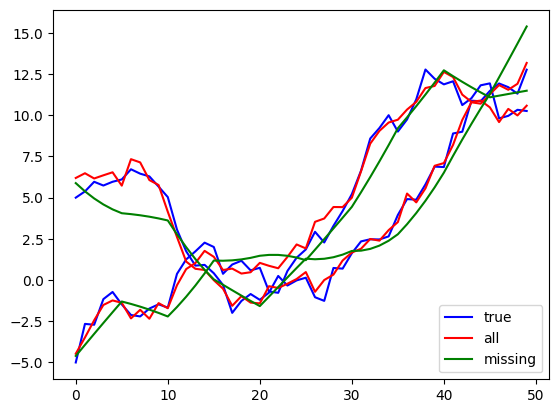

In [7]:
pl.figure()
lines_true = pl.plot(states, color="b")
lines_smooth_all = pl.plot(smoothed_states_all, color="r")
lines_smooth_missing = pl.plot(smoothed_states_missing, color="g")
pl.legend(
    (lines_true[0], lines_smooth_all[0], lines_smooth_missing[0]),
    ("true", "all", "missing"),
    loc="lower right",
)
pl.show()